# Tutorial: Running community dynamics simulations

This tutorial will teach you how to simulate microbial communities using my ecological_models package. You will be simulating microbial community dynamics using the generalised Lotka-Volterra model (gLV).

## Introduction to modelling microbial interactions using the generalised Lotka-Volterra model.

### Motivation

Microbial communities perform diverse functions that arise from interactions between organisms. These so-called community functions often have important biotechnological applications, such as improving gut health, degrading toxins and boosting crop productivity. To engineer microbiomes with high community function, we need to understand how microbial interactions give rise to community properties, such as biodiversity and productivity.

Microbes can interact in a variety of ways. For example, they can compete for a shared nutrient resource, cooperate through cross-feeding on metabolic waste products or sharing essential biological compounds, and even predate each other. 
We can use mathematical models that describe the diversity and complexity of species interactions using simple mathematical expressions to predict community properties.

The generalised Lotka-Volterra model (gLV) is commonly used by ecologists to model ecological dynamics. The model can describe predator-prey interactions, competition and cooperation. However, in our work, we will only model competition between microbes.

### The generalised Lotka-Volterra model

The gLV describes the change in biomass of species $i$ $(N_i)$ over time as

$$\frac{dN_i}{dt} = 
\underbrace{
\vphantom{\sum_{j=1(\neq i)}^S\alpha_{i,j}N_j}
N_i}_{\substack{\text{biomass of} \\ \text{species i}}}
\left(\underbrace{
\vphantom{\sum_{j=1(\neq i)}^S\alpha_{i,j}N_j}
g_i}_{\substack{\text{intrinsic} \\ \text{growth rate}}} - 
\underbrace{
\vphantom{\sum_{j=1(\neq i)}^S\alpha_{i,j}N_j}
\frac{N_i}{K_i}
}_{\text{self-inhibition}} - 
\underbrace{\sum_{j=1(\neq i)}^S\alpha_{i,j}N_j}_{\substack{\text{effect of species } j \\ \text{on } i}}
\right) + 
\underbrace{
\vphantom{\sum_{j=1(\neq i)}^S\alpha_{i,j}N_j}
D}_{\text{dispersal}}
.$$

$N_i$ = the biomass or population size of species $i$. <br>

$S$ = the species pool size, or the initial number of species in the community. <br>

$g_i$ = the per capita growth rate of species $i$. <br>

$K_i$ = the carrying capacity of species $i$. It is usually set to 1, making self-inhibition $=N_i$.

> In the absence of any other species, species $i$ will initially grow at rate $g_iN_i$. Species $i$ will stop growing and reach steady state when $N_i = K_i$.

$\alpha_{i,j}$ = the per capita effect of species $j$ on the growth of species $i$. This is known as an interspecific interaction, or interaction strength. <br>
> When $\alpha_{i,j} > 0$, species $j$ has a negative effect on species $i$'s growth, so the interaction is competitive. When $\alpha_{i,j} < 0$, species $j$ has a positive effect on species $i$'s growth, so the interaction is cooperative. In our simulations, $\alpha_{i,j}$ is always $> 0$.

$D$ = the constant dispersal rate.
> This term is extremely small and doesn't describe any real biology. However, in simulations it reduces numerical instability and allows communities to reach uninvadable steady states.

### Linear algebra representation of gLVs (introduction to the interaction matrix)

Alternatively, gLVs can be written in matrix form.

$$\frac{dN_i}{dt} = N_if_i(\mathbf{N})+D,$$ 
where 
$$\mathbf{f =}
\underbrace{
\left[
\begin{array}{c}
g_1
\\
g_2
\\
\vdots
\\
g_s
\end{array}
\right]
}_{\substack{\text{intrinsic} \\ \text{growth rates}}}
-
\underbrace{
\left[
\begin{array}{ccc}
1 & \alpha_{1,2} & \cdots & \alpha_{1,s}\\
\alpha_{2,1} & 1 & \cdots & \alpha_{2,s}\\
\vdots & \vdots & \ddots & \vdots \\
\alpha_{s,1} & \alpha_{s,2} & \cdots & 1
\end{array}
\right]
}_{\text{interaction matrix}}
\left[
\begin{array}{c}
N_1
\\
N_2
\\
\vdots
\\
N_s
\end{array}
\right].
$$

Again, $N_i$ is the biomass of species $i$ and $D$ is the constant dispersal rate.

$\mathbf{f}$ can be broken down into intrinsic growth rates $(g_i)$ and the **interaction matrix**. 

The interaction matrix describes all species interactions. The diagnonal of the interaction matrix is the self-inhibition of species $i$, or $1/K_i$. The other matrix terms are interspecies interactions, or $\alpha_{i,j}$.
> When discussing the properties of gLVs, we will reference the interaction matrix.

### Generating the interaction matrix and its affect on community dynamics

The interaction matrix is an $S \times S$ matrix describing all species interactions in the model. The diagnonal of the interaction matrix is the self-inhibition of species $i$, or $1/K_i$. The other matrix terms are interspecies interactions, or $\alpha_{i,j}$.

- Typically, self-inhibition is set to 1.

- Interspecific interactions, so the rest of the interaction matrix, are randomly drawn from a normal distribution with mean $\mu_{\alpha}$ and variance $\sigma_{\alpha}^2$. This expressed mathematically is
$$\alpha_{i,j} \sim \mathcal{N}(\mu_{\alpha},\sigma_{\alpha}^2).$$

The mean and variance of the distribution the interaction matrix is drawn from affects community dynamics.

When the mean interaction strength and variance is low, communities are diverse/most species survive and population dynamics are stable over time. This dynamical region is called the Unique Fixed Point (UFP).

As the mean interaction strength and variance increases, communities transition into the Multi-Attractor region (MA). In this region, communities can exhibit high-diversity fluctuating states, or low diversity stable and oscillating states.
> **We are interested in how these different dynamical regimes affect community properties and community selection strategies.**

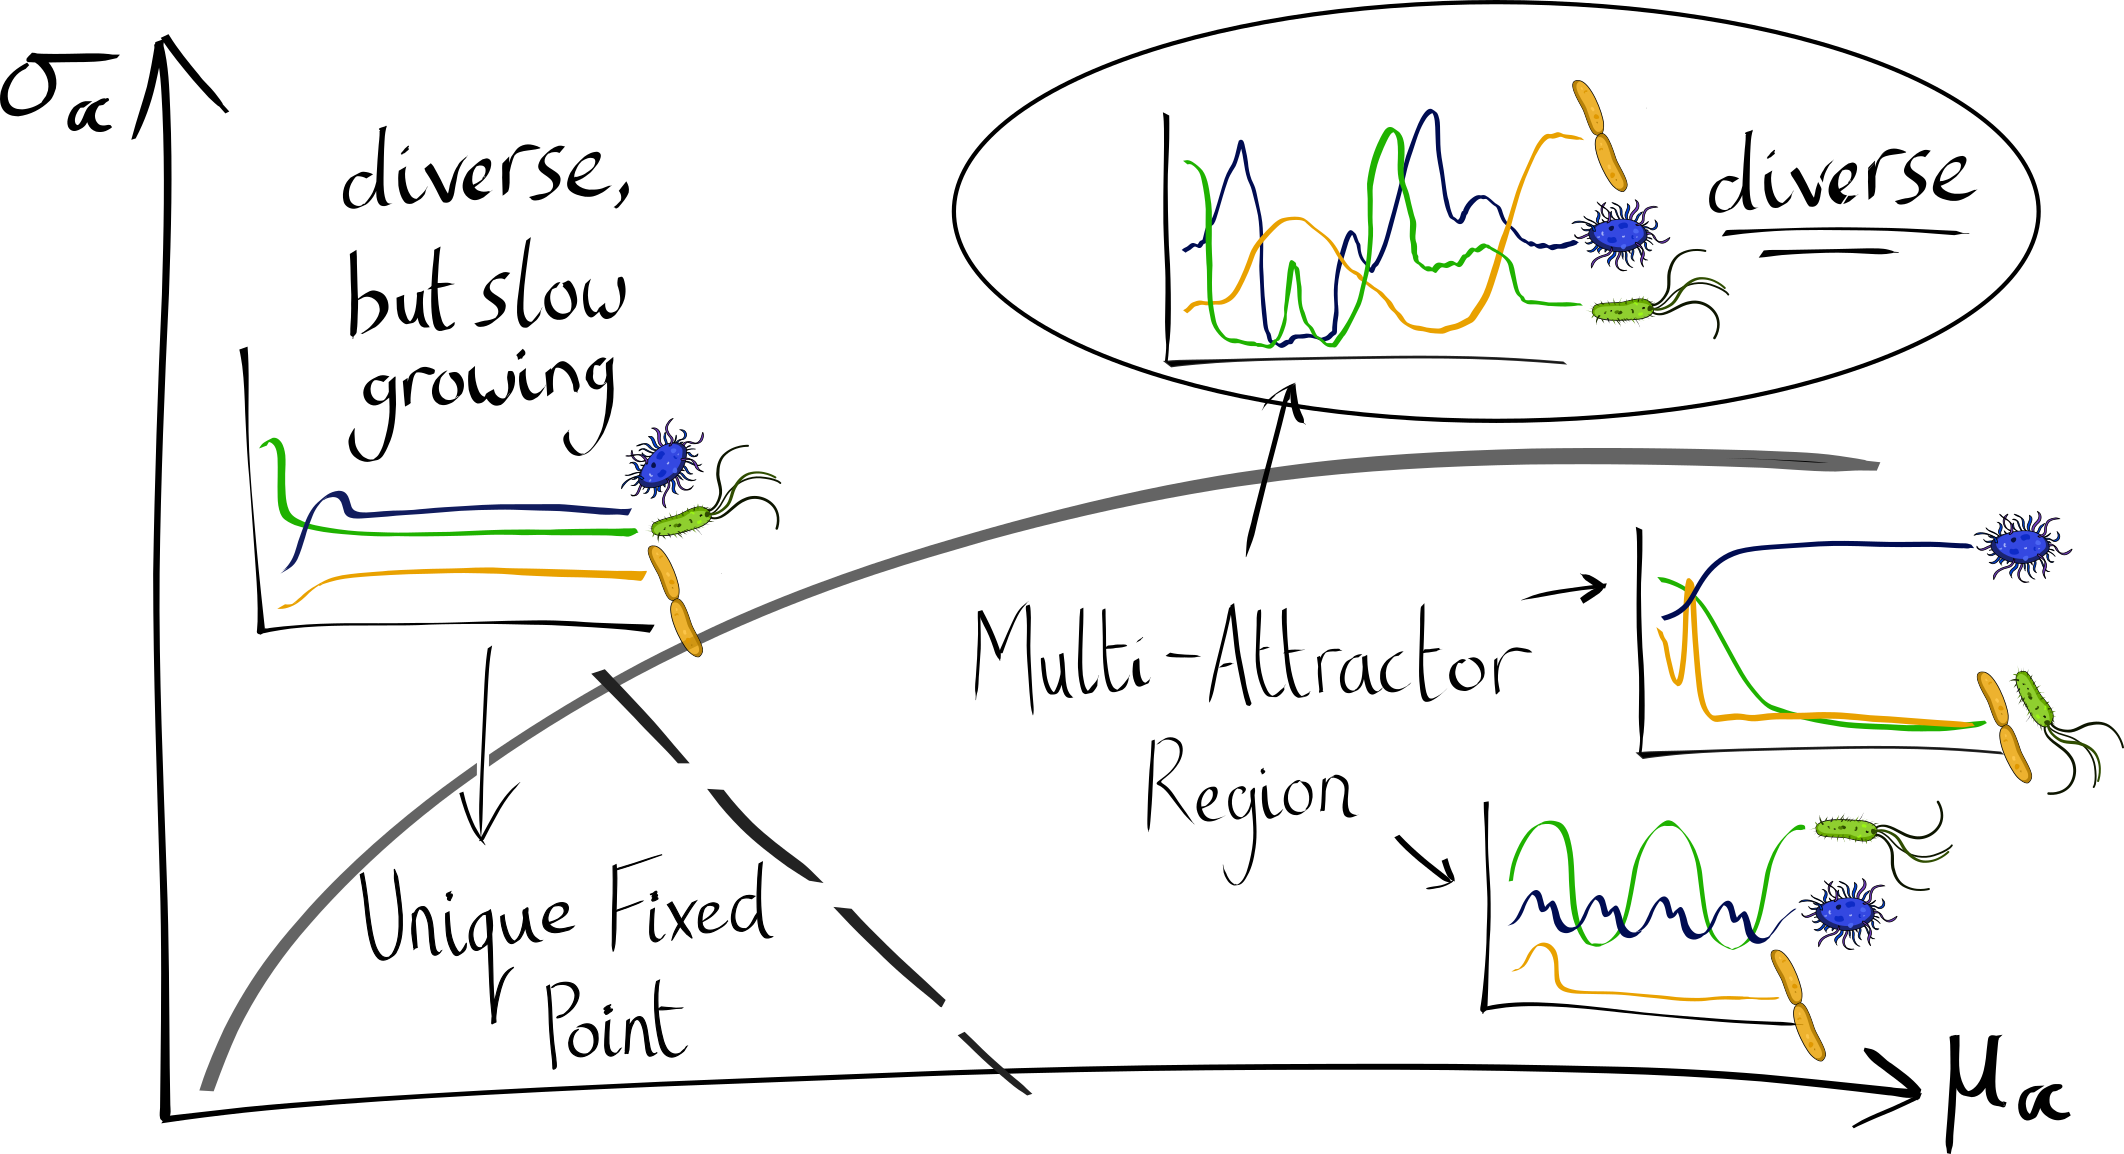

In addition, as species pool size $S$ increases, communities get pushed into the MA region.

#### Identifying community properties using the re-invadability metric.

We have developed a simple re-invadability metric to distinguish between fluctuating and other community dynamics.

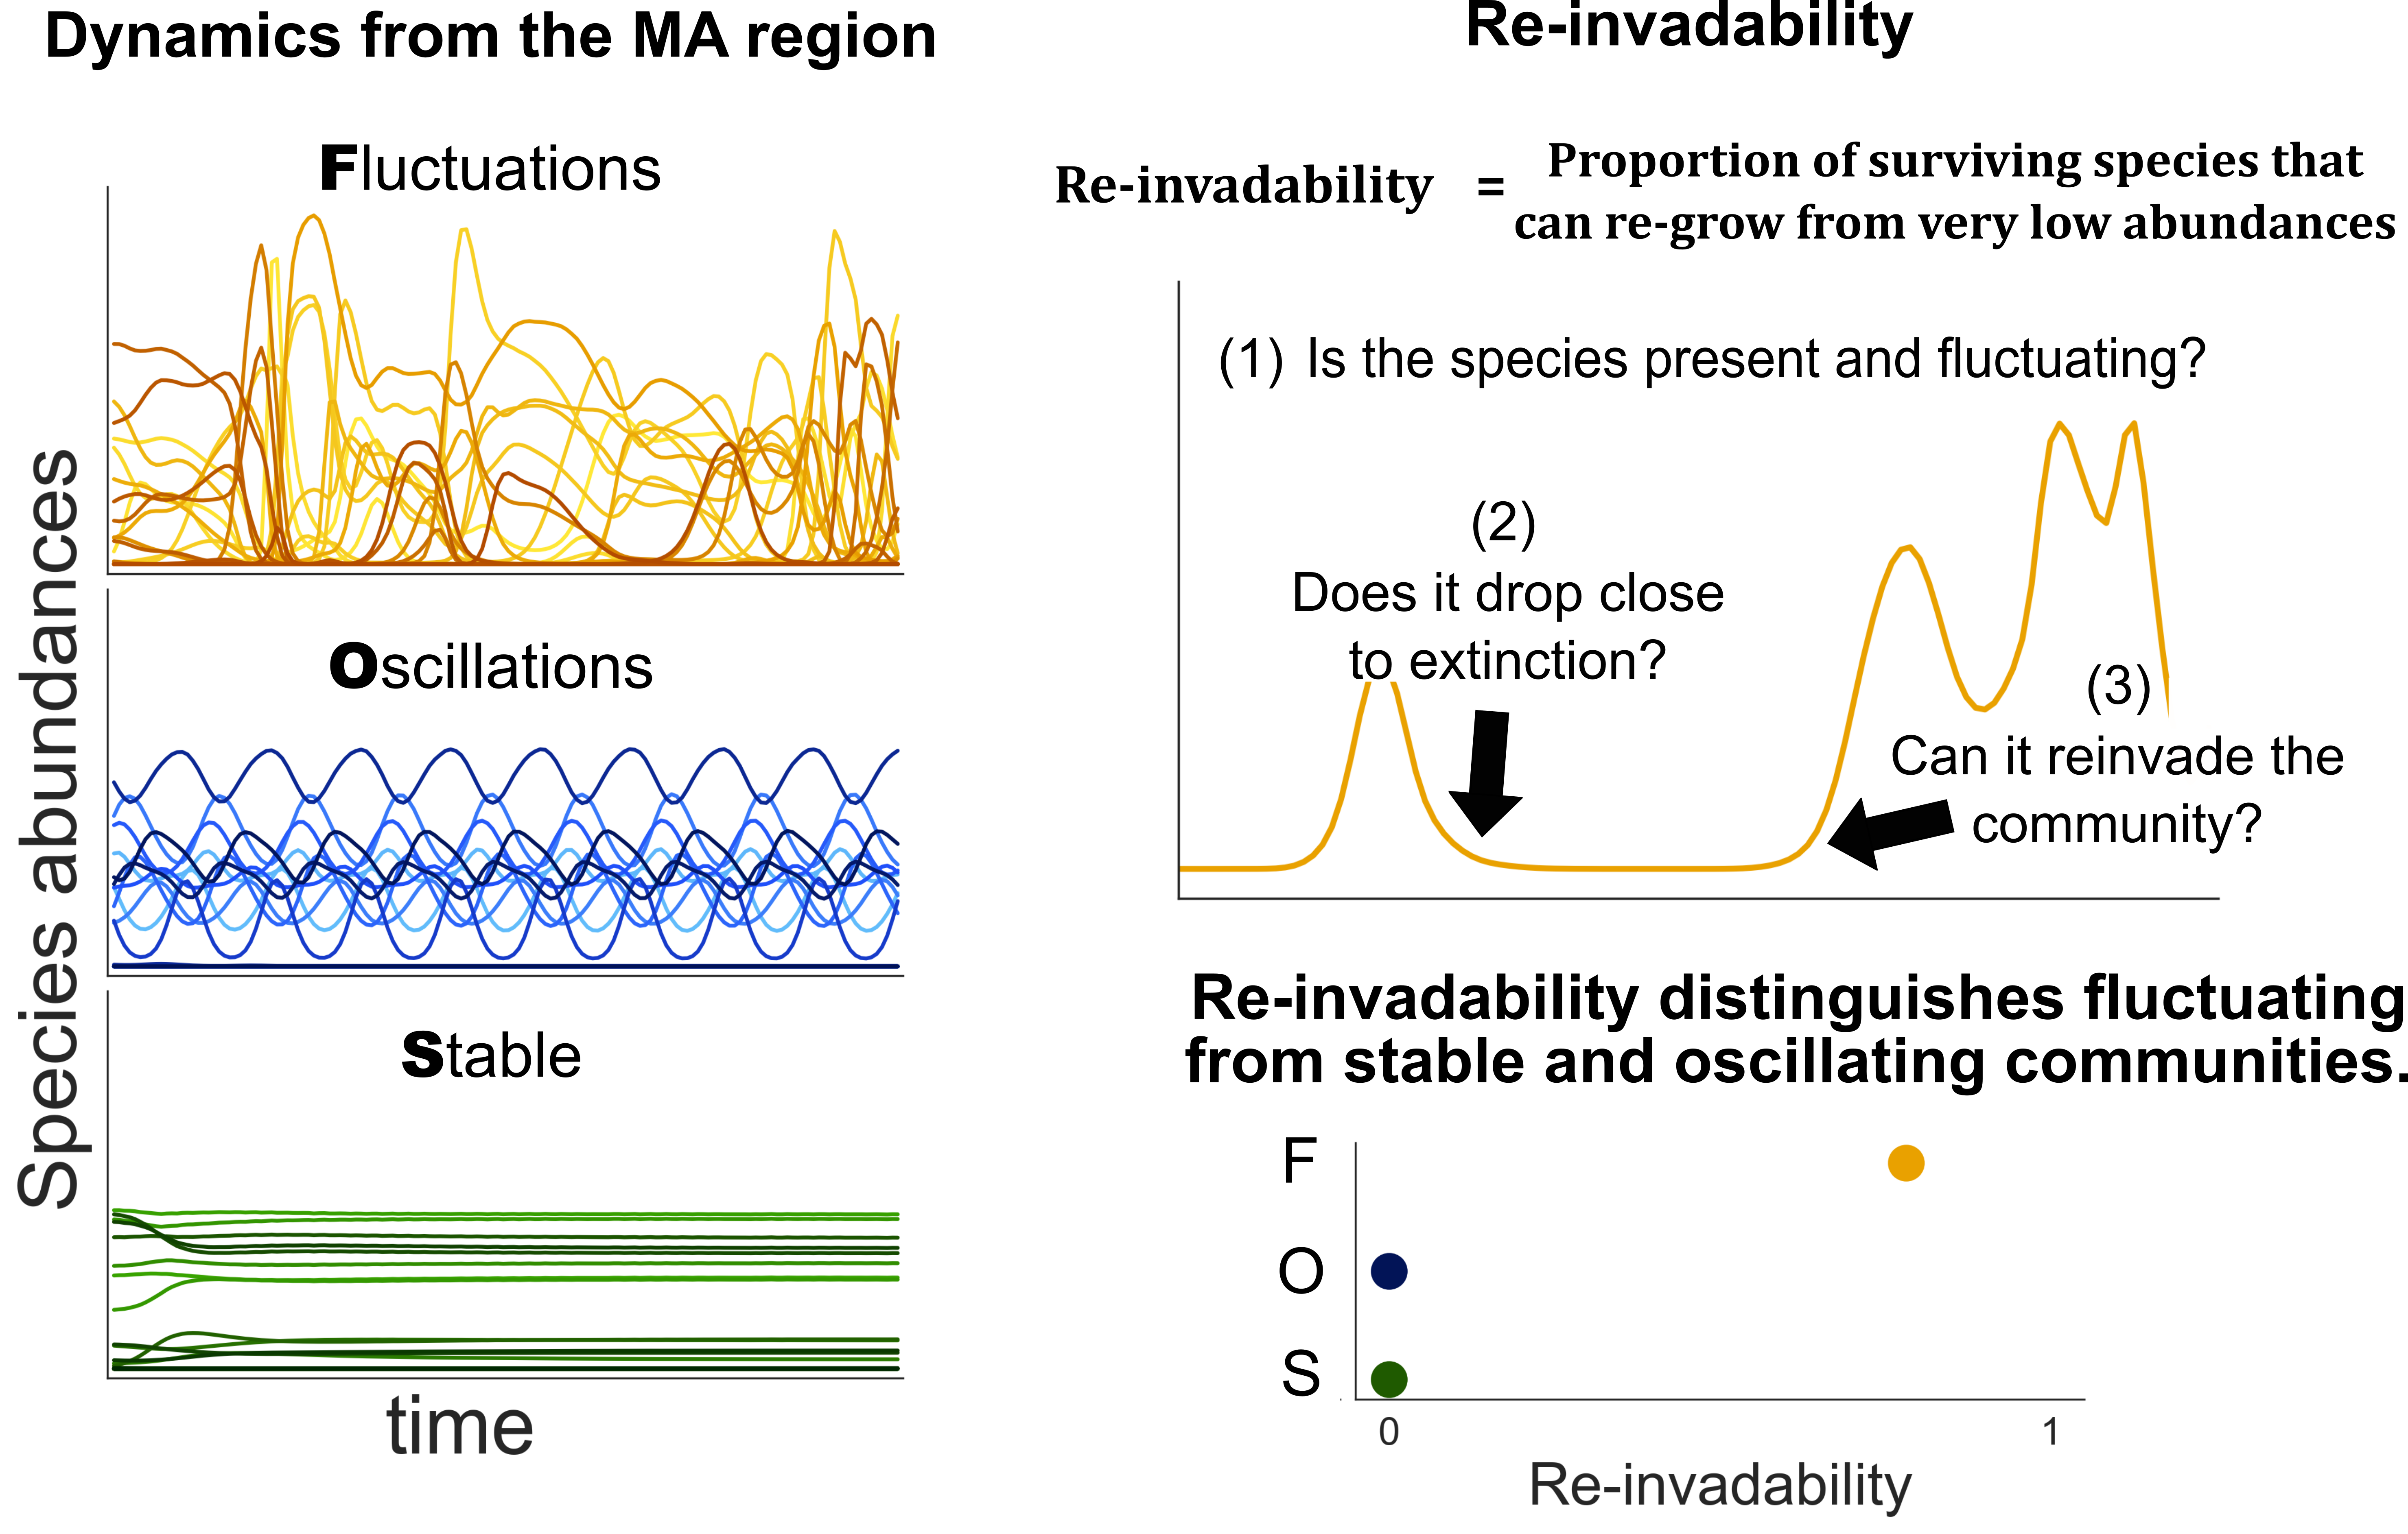

## Running gLVs using **ecological_models** package.

This section will explain how you can run community dynamics simulations using the **ecological_models** package.
Communities are usually created and simulated using the **gLV class**. The **gLV** inherits from these three interfaces (interfaces are classes that store functions):
- The **ParametersInterface**, which contains functions for creating model parameters.
- The **InitialConditionsInterface**, which contains functions for generating initial species abundances.
- The **CommunityPropertiesInterface**, which contains functions for calculating community properties, e.g. species diversity.

The **gLV** class has the method *simulate_community* to simulating community dynamics from different initial species abundances.

### Import Packages

Firstly, we need to import our required packages.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import importlib
import sys

sys.path.insert(0, 'model_modules')
from ecological_models import gLV
from utility_functions import *

In [2]:
%load_ext autoreload
%autoreload 2

### Generating model parameters

The gLV has several parameters: number of species ($S$), species growth rates ($g$), and the interaction matrix.
We first create an object of the community_parameters class to hold or create all these parameters.

A community_parameters object always has these four *attributes* (variables bound in a class):
- ***no_species***, the species pool size or initial number of species in the community ($S$).
- ***growth_rates***, species growth rates ($\mathbf{g}$).
- ***interaction_matrix***, the interaction matrix.
- ***dispersal***, the dispersal rate ($D$).

**no_species** and **dispersal** are supplied by the user.
> When creating the community_parameters object, set no_species = $<$your species pool size$>$ and dispersal = $<$your dispersal rate$>$.

There are are several ways to generate **growth_rates** and the **interaction_matrix**. Either you can supply your own array of growth rates or interaction matrix, or you can call some of the *class methods* to generate them for you:
- **growth_rates**
    - The 'fixed' method: All species growth rates are set to 1.
      > When creating the community_parameters object, set *growth_func='fixed'*, *growth_args=None*, and *usersupplied_growth=None*.
    - The 'normal' method: Growth rates are drawn from a normal distribution $\mathcal{N}(\mu_g,\sigma_g)$.
      > When creating the community_parameters object, set *growth_func='normal'*, *growth_args={'mu_g':$<$your mean growth rate$>$,'sigma_a':$<$your standard deviation$>$}*, and *usersupplied_growth=None*.
    - To supply your own growth rates, you can set usersupplied_growth to your own array.
      > When creating the community_parameters object, set *growth_func=None*, *growth_args=None*, and *usersupplied_growth=$<$your array of growth rates$>$*.
- **interaction_matrix**
    - The 'random' method: A random interaction matrix, drawn from $\mathcal{N}(\mu_{\alpha},\sigma_{\alpha})$, is created.
      > When creating the community_parameters object, set *interact_func='random'*, *interact_args={'mu_a':$<$your mean interaction strength$>$,'sigma_a':$<$your standard deviation$>$}*, and *usersupplied_interactmat=None*.
    - To supply your own interaction matrix, you can set usersupplied_interactmat to your own matrix.
      > When creating the community_parameters object, set *interact_func=None*, *interact_args=None*, and *usersupplied_interact=$<$your interaction matrix$>$*.
    - There are other methods for generating structured interaction matrices, but these are not relevent to your project.

##### Examples

1. Create a community with 3 species, fixed growth rates, a random interaction matrix drawn from $\mathcal{N}(0.9,0.15)$ and dispersal set to $10^{-8}$.

In [3]:
gLV_object = gLV(no_species=3, growth_func='fixed', growth_args=None,
                 interact_func='random', interact_args={'mu_a':0.9,'sigma_a':0.15},
                 dispersal=1e-8)

2. Create a community with 3 species, growth rates drawn from $\mathcal{N}(1,0.3)$, a random interaction matrix drawn from $\mathcal{N}(0.9,0.15)$ and dispersal set to $10^{-8}$.

In [4]:
gLV_object = gLV(no_species=3, growth_func='normal', growth_args={'mu_g':1,'sigma_g':3},
                 interact_func='random', interact_args={'mu_a':0.9,'sigma_a':0.15},
                 dispersal=1e-8)

3. Create a community with 3 species, growth rates = $[1.1,0.7,1.5]$ and the interaction matrix = $\left[\begin{array}{c} 1 & 0.2 & 1.4 \\ 0 & 1 & 0.6 \\ 1.1 & 0.9 & 1 \end{array}\right]$, and dispersal set to $10^{-8}$.

In [5]:
user_growth_rates = np.array([1.1,0.7,1.5]) # growth rates = 1.1, 0.7 and 1.5
user_interaction_matrix = np.array([[1,0.2,1.4],[0,1,0.6],[1.1,0.9,1]])

gLV_object = gLV(no_species=3, growth_func=None, growth_args=None, interact_func=None, interact_args=None,
                 usersupplied_growth=user_growth_rates, usersupplied_interactmat=user_interaction_matrix,
                 dispersal=1e-8)

You can then inspect the attributes of your community_parameters object, aka your model parameters, using community_parameters_object.$<$attribute$>$:

In [6]:
print('Species pool size =', gLV_object.no_species, end='\n')
print('Growth rates =', gLV_object.growth_rates, end='\n')
print('Interaction matrix =', gLV_object.interaction_matrix, end='\n')
print('Dispersal =', gLV_object.dispersal, end='\n')

Species pool size = 3
Growth rates = [1.1 0.7 1.5]
Interaction matrix = [[1.  0.2 1.4]
 [0.  1.  0.6]
 [1.1 0.9 1. ]]
Dispersal = 1e-08


### Running simulations.

To run simulations, you need to call the *simulate_community* method on your gLV_object. *simulate_community* will generate *n* initial species abundances, then simulate community dynamics from each set of initial conditions.

The important gLV class attributes for simulating community dynamics are:
- ***t_end***, the time to run simulations.
- ***initial_abundances***, initial species abundances, supplied to the ODE solver.
- ***ODE_sols***, simulations run for *n* different initial species abundances. Each simulation is stored in a dictionary, labelled as a different *lineage*.  (A single simulation is *scipy.integrate.solve_ivp* object using the Runge-Kutta method for numerically solving ODEs.)

***t_end*** is supplied by the user when creating the gLV object.

There are several ways to generate initial species abundances:
- The 'Mallmin' method: From Mallmin et al. (2024), generate initial species abundances from a uniform distribution $\mathcal{U}(D,S/2)$.
  > This is the default method for generating initial conditions. You will not need to supply anything to *simulate_community*.
- The 'Hu' method: From Hu et al. (2022), generate initial species abundances from a uniform distribution $\mathcal{U}(0,2\mu_{\alpha})$.
   > When calling *simulate_community*, set the function argument *init_cond_func = 'Hu'*.
- To supply your own inital species abundances, set usersupplied_init_cond to your array of initial abundances.
   > When calling *simulate_community*, set the function argument  *usersupplied_init_cond = $<$your initial species abundances$>$*.

***ODE_sols*** are generated automatically by *simulate_community*.

##### Examples

(These example will use a community with 50 species, fixed growth rates, a random interaction matrix drawn from $\mathcal{N}(0.9,0.15)$ and dispersal set to $10^{-8}$.)

In [7]:
gLV_object = gLV(no_species=50, growth_func='fixed', growth_args=None,
                 interact_func='random', interact_args={'mu_a':0.9,'sigma_a':0.15},
                 dispersal=1e-8)

1. Run 5 simulations for t = 5000, generating initial conditions using the 'Mallmin' method.

In [8]:
no_lineages = 5

gLV_object.simulate_community(np.arange(no_lineages), t_end = 5000)

1. Run 5 simulations for t = 5000. You should use your own array of initial species abundances, where all species abundances are set to 0.5.

In [9]:
no_lineages = 5

initial_abundances = np.tile(0.5,(no_lineages,50)) # creates an array with dimensions no_species x no_lineages

gLV_object.simulate_community(np.arange(no_lineages), t_end = 5000, init_cond_func = None,
                                             usersupplied_init_conds=initial_abundances.T)

You can plot your simulation using the ODE_sol attribute.

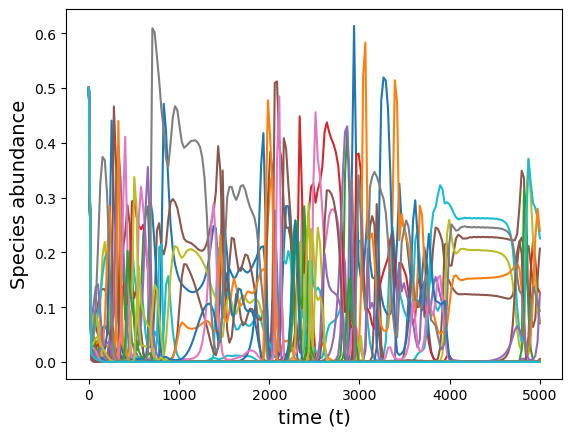

In [14]:
plt.plot(gLV_object.ODE_sols['lineage 0'].t,gLV_object.ODE_sols['lineage 0'].y.T)
plt.xlabel('time (t)',fontsize=14)
plt.ylabel('Species abundance',fontsize=14)
plt.show()

### Analysising community properties.

As well as simulate microbial communities, the **gLV** class can analyse community properties, such as species diversity, ecological, etc. The **gLV** class inherits from **CommunityPropertiesInterface**, which contains functions for analysing communtiy dynamics.

The community properties/attributes the gLV can calculate are:
- ***final_diversity***, the species diversity at the end of simulations.
- ***final_composition***, the species present at the end of simulation.
- ***reinvadability***, the proportion of species present at the end of simulations that can reinvade the community from very low abundances. **This is used to distinguish between high diversity "fluctuating" communities (our communities of interest) and stable communities or limit-cycles.**
- ***no_unique_compositions*** and ***unique_composition_label***, which tells you how many unique species compositions there are between lineages, and which lineage has which composition.

To calculate community properties, create a gLV object, the call the *identify_community_properties* method. (This method is stored in CommunityPropertiesInterface, unlike *simulate_community*). To use this method, you supply the number of lineages (n) you want to calculate community properties for, and *from_which_time*, which tells the function what time to start calculating community properties from.

##### Examples

Calculate community properties from t = 3000 to the end of simulations.

In [11]:
no_lineages = 5

gLV_object.calculate_community_properties(np.arange(no_lineages),from_which_time = 3000)

print('Species diversity at the end of simulation = ', gLV_object.final_diversity, end='\n')
print('Species composition at the end of simulation = ', gLV_object.final_composition, end='\n')
print('Reinvadability = ', gLV_object.reinvadability, end='\n')

Species diversity at the end of simulation =  {'lineage 0': 30, 'lineage 1': 30, 'lineage 2': 30, 'lineage 3': 30, 'lineage 4': 30}
Species composition at the end of simulation =  {'lineage 0': array([ 0,  3,  4,  5,  9, 10, 13, 15, 16, 17, 18, 19, 22, 23, 25, 27, 29,
       30, 31, 34, 35, 36, 37, 38, 40, 42, 44, 45, 47, 48], dtype=int64), 'lineage 1': array([ 0,  3,  4,  5,  9, 10, 13, 15, 16, 17, 18, 19, 22, 23, 25, 27, 29,
       30, 31, 34, 35, 36, 37, 38, 40, 42, 44, 45, 47, 48], dtype=int64), 'lineage 2': array([ 0,  3,  4,  5,  9, 10, 13, 15, 16, 17, 18, 19, 22, 23, 25, 27, 29,
       30, 31, 34, 35, 36, 37, 38, 40, 42, 44, 45, 47, 48], dtype=int64), 'lineage 3': array([ 0,  3,  4,  5,  9, 10, 13, 15, 16, 17, 18, 19, 22, 23, 25, 27, 29,
       30, 31, 34, 35, 36, 37, 38, 40, 42, 44, 45, 47, 48], dtype=int64), 'lineage 4': array([ 0,  3,  4,  5,  9, 10, 13, 15, 16, 17, 18, 19, 22, 23, 25, 27, 29,
       30, 31, 34, 35, 36, 37, 38, 40, 42, 44, 45, 47, 48], dtype=int64)}
Reinvadab

Community properties are calculated from t = *from_which_time* - end of simulations. *from_which_time* is a time supplied by the user. If you want to calculate community properties at other times during the simulation, you should play around with the code in *calculate_community_properties*.

#### Summary of important **gLV** class attributes

- **Model parameters**
  - ***no_species***, the initial number of species in the community.
  - ***growth_rates***, species growth rates.
  - ***interaction_matrix***, the interaction matrix.
  - ***dispersal***, the dispersal rate.
- **Simulations**
  - ***t_end***, the time to run simulations.
  - ***initial_abundances***, initial species abundances for all lineages.
  - ***ODE_sols***, Simulated community dynamics for each lineage (A *scipy.integrate.solve_ivp* object using the Runge-Kutta method for numerically solving ODEs.)
- **Community properties**
  - ***diversity***, the species diversity of each lineage at the end of simulations. Technically, species diversity is calculated in the final 20% of the simulation (e.g. if the simulation ran until t = 10000, species diversity is calculated from t = 8000-10000).
  - ***final_composition***, the species present in each lineage at the end of simulation. Also calculated from the final 20% of the simulation.
  - ***no_unique_compositions***, the number of unique species compositions a community can achieve from different initial conditions. Aka, the number of unique final species compositions across lineages.
  - ***unique_composition_label***, tells you which lineage has which unique species composition. Can be used to calculate the probability of a community adopting a certain composition.
  - ***reinvadability***, the proportion of species in each lineage that are able to reinvade the community from very low abundances. **This is used to distinguish between high diversity "fluctuating" communities (our communities of interest) and low diversity stable communities or limit-cycles.**

### Utility functions

The **utility_functions** package contains random useful functions for working with ecological dynamics simulations. For example, it has functions for calculating means and standard deviations at once.

The most useful function in **utility_functions** is *community_object_to_df*. This function stores *gLV* class attributes as a dataframe for easy analysis. You can decide what attributes you want to store in the dataframe using the *community_attributes* functions. You can also easily distinguish between different communities, with different model parameters, using the *community_label* function.

##### Examples

In [12]:
gLV_df = community_object_to_df(gLV_object,community_label = 0,
                               community_attributes=['mu_a','sigma_a','no_species','final_diversity','reinvadability'])

print(gLV_df.head())

   community  lineage  mu_a  sigma_a  no_species  final_diversity  \
0        0.0      0.0   0.9     0.15        50.0             30.0   
1        0.0      1.0   0.9     0.15        50.0             30.0   
2        0.0      2.0   0.9     0.15        50.0             30.0   
3        0.0      3.0   0.9     0.15        50.0             30.0   
4        0.0      4.0   0.9     0.15        50.0             30.0   

   reinvadability  
0        0.964286  
1        0.964286  
2        0.964286  
3        0.964286  
4        0.964286  


## Final remarks

If you want to understand more about how the model and classes work, please look at the documentation in ecological_dynamics.py, which stores the gLV class, model_parameters.py, which contains ParametersInterface, initial_conditions.py, which contains InitialConditionsInterface, community_properties.py, which contains CommunityPropertiesInterace, and utility_functions.py.
> If you're not sure how a function works from reading the code, add a *breakpoint()* statement into the function you're interested in. When you run the script, the code will stop (in debug mode) in this function. This allows you to inspect local variables and play around with the function.
